In [1]:
from sklearn.externals import joblib

c:\users\meeta\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
classifier = joblib.load('saved_classifier.pkl')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [8]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\meeta\Downloads\graphviz-2.38\release\bin'

In [9]:
from keras.utils import plot_model
plot_model(
    classifier,
    to_file='model.png',
    show_shapes=False,
    show_layer_names=True,
    rankdir='TB'
)

In [43]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical

train = pd.read_csv('C:/Users/meeta/Desktop/TSWE2019/sign-language-recognition/dataset/sign_mnist_train.csv', header = 0)
test = pd.read_csv('C:/Users/meeta/Desktop/TSWE2019/sign-language-recognition/dataset/sign_mnist_test.csv', header = 0)

y_train = train['label'].values
y_test = test['label'].values

x_train = train.drop(['label'],axis=1)
x_test = test.drop(['label'], axis=1)

x_train = np.array(x_train.iloc[:,:])
# print(x_train[:5])
x_train = np.array([np.reshape(i, (28, 28)) for i in x_train])

x_test = np.array(x_test.iloc[:,:])
x_test = np.array([np.reshape(i, (28, 28)) for i in x_test])
# print(x_test[0])

x_train = x_train/255
x_test = x_test/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


print('Training examples:',x_train.shape[0])
print('Test examples:',x_test.shape[0])

print('X_train shape"',x_train.shape)
print('y_train shape"',y_train.shape)
print('X_test shape"',x_test.shape)
print('y_test shape"',y_test.shape)

x_train = x_train.reshape((27455, 28, 28, 1))
x_test = x_test.reshape((7172, 28, 28, 1))

print(x_train.shape)
print(y_train.shape)

Training examples: 27455
Test examples: 7172
X_train shape" (27455, 28, 28)
y_train shape" (27455, 25)
X_test shape" (7172, 28, 28)
y_test shape" (7172, 25)
(27455, 28, 28, 1)
(27455, 25)


In [44]:
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pydot

[6.3214774e-21, 9.387515e-21, 4.3210085e-24, 1.4220863e-19, 4.749833e-22, 2.9104767e-16, 2.9603072e-22, 3.577162e-09, 1.0, 0.0, 4.363749e-11, 2.6141808e-19, 1.4134669e-17, 7.225443e-21, 3.3605617e-16, 3.5692913e-12, 1.2087477e-11, 2.9443598e-22, 3.584209e-17, 6.99522e-18, 1.3168826e-25, 3.71767e-11, 7.265946e-18, 7.821685e-15, 3.4889674e-10]
8


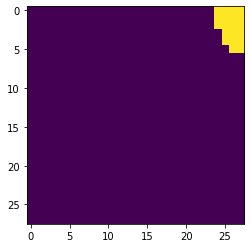

In [45]:
import matplotlib.pyplot as plt
import cv2
LOC = 10
sample = x_test[LOC]

sample = sample.reshape((1,28,28,1))
res = classifier.predict(sample)
res = list(res[0])
print(res)

mx = max(res)
alphabet = str(res.index(mx))
print(res.index(mx))

resultImg = sample.reshape(28,28)
cv2.putText(resultImg, alphabet , (23, 5), cv2.FONT_HERSHEY_COMPLEX , 0.8, (255, 255, 255), 2, cv2.LINE_AA)

plt.imshow(resultImg, interpolation='nearest')
plt.show()

In [17]:
sample = sample.reshape((1,28,28,1))
res = classifier.predict(sample)
res = list(res[0])
print(res)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [19]:
mx = max(res)
print(res.index(mx))

8
